# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1]
y.shape

(97,)

Text(0, 0.5, 'Bénéfice x1000')

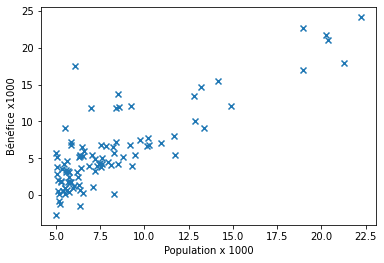

In [4]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [5]:
def computeCostNonVect(X, y, theta):
    return (0.5 * sum((X.dot(theta) - y) ** 2))[0]
    
    

In [6]:
def computeCost(X, y, theta):
    sum = 0
    for x,z in zip(X , y):
        sum  = sum + ((x.dot(theta) - z)**2)[0]
    return sum/(len(X) * 2)
    
  

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [7]:
def gradientDescent(X, y, theta, alpha, iterations):
    thetas= np.zeros((iterations, theta.shape[0]))
    costs = np.zeros(iterations)
    for i in range(iterations):
        calculated_theta = (np.matmul(X.T,(np.matmul(X,theta) - y[:,None]))) * (alpha/len(y))
        theta = theta - calculated_theta
        costs[i] = computeCost(X, y, theta)
        thetas[i,:] = theta[:,0]
    return theta, thetas, costs

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [8]:
theta = np.zeros((2, 1))

Calculer le cout initial

In [9]:
initialCost=computeCost(X, y, theta)
initialCost

32.072733877455654

Appel des la fonction de calcul du gradient

In [10]:
iterations = 1500
alpha = 0.01
theta, thetas, costs = gradientDescent(X, y, theta, alpha, iterations);

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

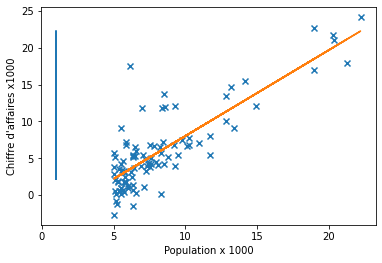

In [11]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

In [12]:
thetas[:,0]

array([ 0.05839135,  0.06289175,  0.05782293, ..., -3.6293317 ,
       -3.62981201, -3.63029144])

array([ 0.05839135,  0.06289175,  0.05782293, ..., -3.6293317 ,
       -3.62981201, -3.63029144])

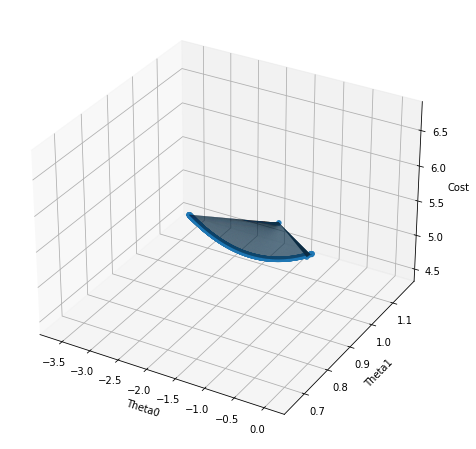

In [18]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(thetas[:,0], thetas[:,1], costs)
ax.plot_trisurf(thetas[:,0], thetas[:,1], costs)
ax.set_ylabel('Theta1')
ax.set_xlabel('Theta0')
ax.set_zlabel('Cost')
thetas[:,0]

Prédire des valeurs de y

In [14]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta);
predict1

array([0.45197679])

In [15]:
predict2 = np.matmul([1, 7],theta);
predict2

array([4.53424501])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [16]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=float)
dataMulti.shape

(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [17]:
intercept=np.ones((dataMulti.shape[0],1))
X=np.column_stack((intercept,dataMulti[:,0:2]))
y = dataMulti[:, 2]

In [ ]:
# redéfinissez vos fonctions de coût si cela est necessaire


Mise à l'échelle des données

In [ ]:
X_max, X_min = X[:, 1:].max(axis=0), X[:, 1:].min(axis=0)
X_normalized = np.full_like(X,1)
X_normalized[:,1:] = (X[:, 1:] - X_min) / (X_max - X_min)

y_max, y_min = y.max(), y.min()
y_normalized = (y - y_min) / (y_max - y_min)
X_normalized

array([[1.        , 0.34528406, 0.5       ],
       [1.        , 0.20628792, 0.5       ],
       [1.        , 0.42691671, 0.5       ],
       [1.        , 0.1555433 , 0.25      ],
       [1.        , 0.59238831, 0.75      ],
       [1.        , 0.31246553, 0.75      ],
       [1.        , 0.18808605, 0.5       ],
       [1.        , 0.15857694, 0.5       ],
       [1.        , 0.145615  , 0.5       ],
       [1.        , 0.17705461, 0.5       ],
       [1.        , 0.30005516, 0.75      ],
       [1.        , 0.31660232, 0.5       ],
       [1.        , 0.28626586, 0.5       ],
       [1.        , 1.        , 1.        ],
       [1.        , 0.11472697, 0.5       ],
       [1.        , 0.39933811, 0.75      ],
       [1.        , 0.12906784, 0.25      ],
       [1.        , 0.10590182, 0.5       ],
       [1.        , 0.48455598, 0.75      ],
       [1.        , 0.60093767, 0.75      ],
       [1.        , 0.25234418, 0.5       ],
       [1.        , 0.28571429, 0.25      ],
       [1.

Normalisation des données en moyenne = 0

In [ ]:
mean, std = X[:, 1:].mean(axis=0), X[:, 1:].std(axis=0)
X_std = np.full_like(X,1)
X_std[:, 1:] = (X[:, 1:] - mean) / std

Ymean, Ystd = y.mean(), y.std()
y_std = (y - Ymean) / Ystd
y_std

array([ 0.48088932, -0.08498423,  0.23109657, -0.87639881,  1.61263643,
       -0.32750147, -0.20624285, -1.14316777, -1.03807697, -0.79151778,
       -0.81172755,  0.05325059, -0.08417584,  2.90606169, -0.65085778,
        0.88508472, -0.32750147, -1.13589226,  1.2900885 ,  2.09039538,
       -0.70744514, -0.69046893, -0.78828422, -0.65085778,  1.88748929,
       -0.73169686,  1.00310977,  1.03948736,  1.0879908 , -0.32750147,
        0.07669393, -1.37840949, -0.20624285,  1.93599274, -0.44067618,
       -0.73169686, -0.89337502,  0.03708278,  1.68619999, -0.43178388,
        0.22705461, -0.08498423, -0.21351837, -0.33477699, -1.29757042,
       -0.32750147, -0.81576951])

Appliquer la descente du gradient à plusieurs variables

In [ ]:
%%time
theta = np.zeros((3, 1), dtype=np.longlong)
alpha = 0.01
iterations = 1500
theta = gradientDescent(X, y, theta, alpha, iterations)[0]
theta
#a caused overflow is due to the very large error values

/tmp/ipykernel_3076/1226606057.py:4: RuntimeWarning: overflow encountered in square
  sum  = sum + ((x.dot(theta) - z)**2)[0]
/tmp/ipykernel_3076/1463099621.py:5: RuntimeWarning: overflow encountered in matmul
  calculated_theta = (np.matmul(X.T,(np.matmul(X,theta) - y[:,None]))) * (alpha/len(y))
/tmp/ipykernel_3076/1463099621.py:6: RuntimeWarning: invalid value encountered in subtract
  theta = theta - calculated_theta


CPU times: user 263 ms, sys: 11.8 ms, total: 275 ms
Wall time: 273 ms


array([[nan],
       [nan],
       [nan]])

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

In [ ]:
%%time
theta_normalized = np.zeros((3, 1), dtype=np.longlong)
theta_normalized = gradientDescent(X_std, y, theta_normalized, alpha, iterations)[0]
theta_normalized

CPU times: user 320 ms, sys: 61 µs, total: 320 ms
Wall time: 324 ms


array([[340412.66939734],
       [109370.02582704],
       [ -6500.53710423]])

Text(0.5, 0, 'Prix')

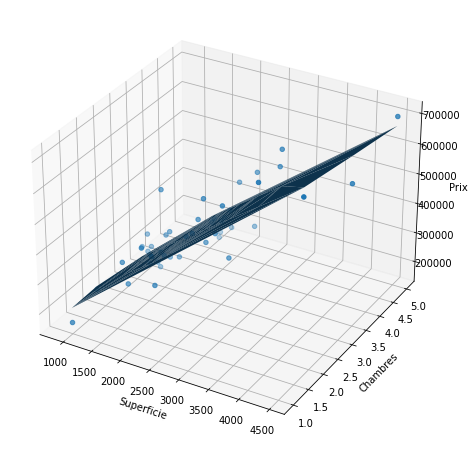

In [337]:
###Graph
prix = X_std.dot(theta_normalized)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], y)
ax.plot_trisurf(X[:,1], X[:,2], prix[:,0])
ax.set_ylabel('Chambres')
ax.set_xlabel('Superficie')
ax.set_zlabel('Prix')

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [403]:
import random
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1]

comp = LinearRegression()
comp.fit(X,y)

theta = gradientDescent(X, y, np.ones((2,1)), alpha, iterations=1500)[0]

value = random.randint(0, X.shape[0])

print("Sklearn prediction:",comp.predict(X[value,:][None, :]))
print("Our model prediction:", X[value,:] @ theta)
print("Correct value:", y[value])

theta_sk = np.copy([comp.coef_])
theta_sk = theta_sk.T
print("erreur de sklearn:",computeCostNonVect(X, y ,theta_sk))
print("erreur de notre model:", computeCostNonVect(X, y ,theta))

Sklearn prediction: [2.91727635]
Our model prediction: [3.05580688]
Correct value: 3.2522
erreur de sklearn: 4017.2451514948725
erreur de notre model: 7600.612003913142


In [400]:
intercept=np.ones((dataMulti.shape[0],1))
X=np.column_stack((intercept,dataMulti[:,0:2]))
y = dataMulti[:, 2]

comp2 = LinearRegression()
comp2.fit(X,y)

theta = gradientDescent(X_std, y, np.ones((3,1)), alpha, iterations=1500)[0]

value = random.randint(0, X.shape[0])

print("Sklearn prediction:",comp2.predict(X[value,:][None, :]))
print("Our model prediction:", (X_std[value,:] @ theta)[0])
print("Correct value:", y[value])


theta_sk = np.copy([comp2.coef_])
theta_sk = theta_sk.T
print("erreur de sklearn:",computeCostNonVect(X, y ,theta_sk))
print("erreur de notre model:", computeCostNonVect(X, y ,theta))

Sklearn prediction: [286121.03514098]
Our model prediction: 286142.98146457865
Correct value: 329900.0
erreur de sklearn: 785889268545.1533
erreur de notre model: 1.2980939385586547e+18


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [ ]:
# bonne chance